This code plots the bootstrapped partial dependence plots

In [1]:
# import libraries
library(data.table)
library(ggplot2)
library(ggthemes)
library(gridExtra)
library(extrafont)

Warning message:
"package 'data.table' was built under R version 3.4.4"Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'ggthemes' was built under R version 3.4.4"Warning message:
"package 'gridExtra' was built under R version 3.4.4"Warning message:
"package 'extrafont' was built under R version 3.4.4"Registering fonts with R


In [2]:
cbbPalette <- c('pink',"#E69F00", "#009E73", "#0072B2", "#56B4E9", "#CC79A7", "#D55E00", "#F0E442")

In [3]:
grid.size <- 100

In [4]:
# import the data
dt = fread(paste0('../../data/regression/results_partial_dependents_', grid.size, '_all.csv'))

# import raw data for the histograms
df = fread(paste0('../../data/data_regressions_', grid.size,'_20190405_unnormalized.csv'))

In [5]:
summary(df)

       V1            alb_max         alb_max_sl        alb_mean     
 Min.   :     0   Min.   : 35.26   Min.   : 35.72   Min.   : 35.17  
 1st Qu.: 47068   1st Qu.: 63.14   1st Qu.: 65.09   1st Qu.: 57.65  
 Median : 94137   Median : 84.45   Median : 86.72   Median : 75.18  
 Mean   : 94137   Mean   : 85.83   Mean   : 85.83   Mean   : 74.79  
 3rd Qu.:141205   3rd Qu.: 98.01   3rd Qu.: 99.76   3rd Qu.: 88.36  
 Max.   :188273   Max.   :339.17   Max.   :271.92   Max.   :294.31  
  alb_mean_sl        alb_min         alb_min_sl         alb_sd      
 Min.   : 35.37   Min.   : 33.43   Min.   : 35.22   Min.   : 0.006  
 1st Qu.: 58.56   1st Qu.: 52.70   1st Qu.: 53.18   1st Qu.: 2.440  
 Median : 76.29   Median : 66.59   Median : 67.45   Median : 3.978  
 Mean   : 74.79   Mean   : 66.63   Mean   : 66.62   Mean   : 6.304  
 3rd Qu.: 89.05   3rd Qu.: 79.74   3rd Qu.: 80.06   3rd Qu.: 7.062  
 Max.   :213.27   Max.   :286.00   Max.   :172.14   Max.   :94.466  
   alb_sd_sl             bldg     

# Plot the PDPs

In [5]:
plots <- list()
ncol.plot <- 5
# xlims <- c(0,30)

In [6]:
feature_names <- c('lcov_11' = '% water','tree_mean'='% tree canopy','ndvi_mean'='ndvi','svf_mean'='sky view factor',
                    'dsm_mean'='digital surface model','alb_mean'='albedo','dsm_sd'='dsm stand. dev.','nbdi_max'='max nbdi',
                    'tree_max'='max % tree can.', 'tree_min'='min % tree can.',
                    'bldg'='% building area','pdens_mean'='pop. density',
                    'tree_sd'= '% tree can. stand. dev.', 'nbdi_sd_sl'='nbdi surrounding stand. dev.',
                    'tree_sd_sl'='% tree can. surrounding stand. dev.',
                    'ndvi_sd'= 'ndvi stand. dev'   )

In [7]:
# calculate the histogram for each of the features
# df_hist <- df[density_housesarea > xlims[1] & density_housesarea < xlims[2],]

In [8]:
if (grid.size == 500){
    hist_scaling <- c(20, 0.8, 12, 0.35, 400, 200, 30, 0.7, 60, 7000)
    } else {
    hist_scaling <- c(35, 0.9, 1.3, 0.45, 400, 
                      250, 10, 0.15, 35, 6000)
}

In [9]:
font.size <- 15

In [10]:
dt_sub <- dt[dependent == 'lst_night_mean',]
plots <- list()
# import the feature order
if (grid.size == 500){
    features = c('tree_mean', 'ndvi_mean', 'lcov_11', 'svf_mean', 'dsm_mean')#, 'alb_mean', 'tree_max', 'nbdi_max', 'bldg', 'pdens_mean')
    hist_scaling <- c(20, 0.8, 12, 0.35, 400)
    } else {
    features = c('tree_mean', 'ndvi_mean', 'alb_mean', 'svf_mean', 'dsm_mean')#, 'alb_mean', 'tree_sd', 'nbdi_sd_sl', 'bldg', 'pdens_mean')
    hist_scaling <- c(25, 0.9, 250, 0.45, 400)
}
# determine the axis limits
y_min <- -8#round(min(dt[,'mean'])*2)/2
y_max <- 5#round(max(dt[,'mean'])*2)/2
ylims <- c(y_min,y_max) - y_min


for (i in seq(length(features))){
    var <- features[[i]]
    # subset the dataframe 
    dt_plot <- dt_sub[independent == var,]
    xlims <- c(min(dt_plot[,x]), max(dt_plot[,x])) + max(dt_plot[,x])*c(-0.05,0.05)
    # plot the lines
    plt <- ggplot(dt_plot,aes(x = x, y = mean - y_min, color = model)) +
        geom_line(aes(group = interaction(model, boot)), alpha = 0.3) +
        geom_hline(yintercept = -y_min, linetype="dashed", color = "red") + 
        xlab(feature_names[var]) + 
        ylab('') + 
        scale_colour_manual(values=cbbPalette) + 
        theme_few()  + 
        theme(text=element_text(size=font.size, family="Corbel"),
              legend.title = element_blank(),
              legend.position="none", 
              plot.title = element_text(size = font.size)
             ) + 
        guides(color = guide_legend(override.aes= list(alpha = 1))) +
        scale_y_continuous(breaks = c(seq(ylims[1], ylims[2],length = 5),-y_min), labels= c(seq(y_min,y_max,length = 5),0)) 
        if (i == 1 || i==6){
            plt <- plt + ylab(expression("change in "*~degree*C)) 
            }
#         ggtitle(health_titles[var]) + 
#         theme_black() +
#     if (i == 8){
#         plt <- plt + theme(text=element_text(size=10),
#               legend.title = element_blank(),
#               legend.position="none", 
#               plot.title = element_text(size = 10)
#              )
#         }
    # plot the histogram
    df_hist <- df[as.vector((df[, ..var] >= xlims[1]) & (df[,..var] <= xlims[2])),]
    plt <- plt + geom_histogram(data=df_hist, bins=30, mapping=aes_string(var, paste0('..density..*',hist_scaling[i])), color = 'black', alpha = 0.5)
    plt <- plt + coord_cartesian(ylim=ylims, xlim=xlims, expand=0)  
    # add to list
    plots[[i]] <- plt
#     ggsave('../../fig/report/pdp_uncert_night.png', plt, width=17.8/2.54, height=11.5/2.54)
    }

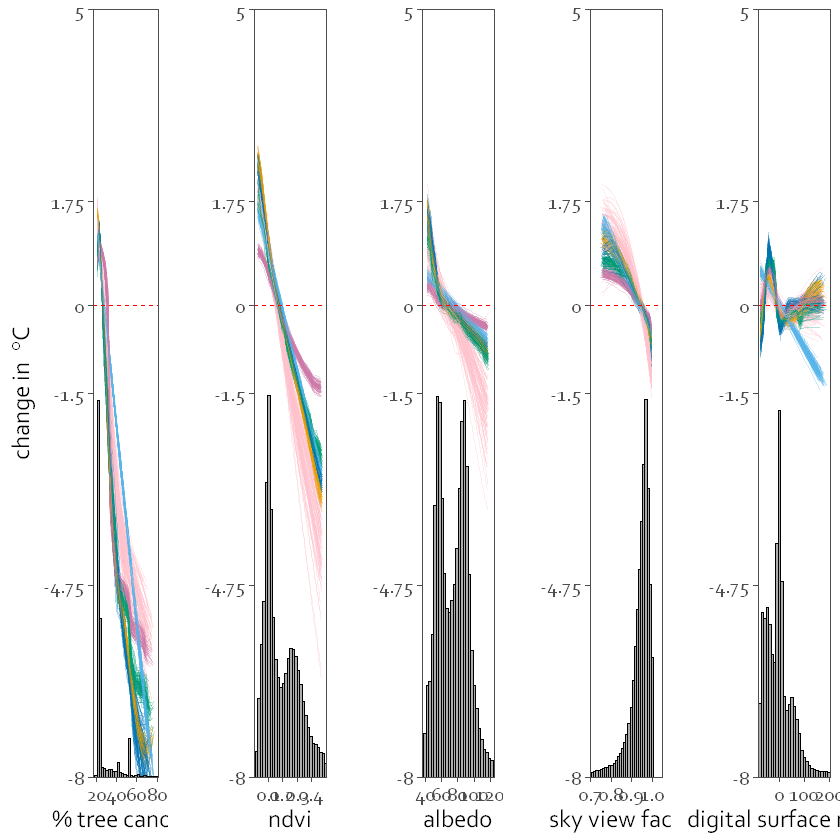

In [11]:
plots.grid <- do.call("grid.arrange", c(plots, ncol=ncol.plot))
outname <- paste0('../../fig/report/pdp_uncert_night_',grid.size,'.png')
ggsave(outname, plots.grid, width=17.8, height=3.5, dpi=500)

In [12]:
dt_sub <- dt[dependent == 'lst_day_mean',]
plots <- list()
# import the feature order
if (grid.size == 500){
    features <- c('lcov_11', 'ndvi_mean', 'tree_mean', 'alb_mean','dsm_mean')
    hist_scaling <- c(12, 0.8, 20, 200, 400)
    } else {
    features = c('tree_mean', 'ndvi_mean', 'alb_mean', 'dsm_mean', 'svf_mean')#, 'alb_mean', 'tree_sd', 'nbdi_sd_sl', 'bldg', 'pdens_mean')
    hist_scaling <- c(25, 0.9, 250, 400, 0.45)
}
# determine the axis limits
y_min <- -8#round(min(dt[,'mean'])*2)/2
y_max <- 5#round(max(dt[,'mean'])*2)/2
ylims <- c(y_min,y_max) - y_min

for (i in seq(length(features))){
    var <- features[[i]]
    # subset the dataframe 
    dt_plot <- dt_sub[independent == var,]
    xlims <- c(min(dt_plot[,x]), max(dt_plot[,x])) + max(dt_plot[,x])*c(-0.05,0.05)
    # plot the lines
    plt <- ggplot(dt_plot,aes(x = x, y = mean - y_min, color = model)) +
        geom_line(aes(group = interaction(model, boot)), alpha = 0.3) +
        geom_hline(yintercept = -y_min, linetype="dashed", color = "red") + 
        xlab(feature_names[var]) + 
        ylab('') + 
        scale_colour_manual(values=cbbPalette) + 
        theme_few()  + 
        theme(text=element_text(size=font.size, family="Corbel"),
              legend.title = element_blank(),
              legend.position="none", 
              plot.title = element_text(size = font.size)
             ) + 
        guides(color = guide_legend(override.aes= list(alpha = 1))) +
        scale_y_continuous(breaks = c(seq(ylims[1], ylims[2],length = 5),-y_min), labels= c(seq(y_min,y_max,length = 5),0)) 
        if (i == 1 || i==6){
            plt <- plt + ylab(expression("change in "*~degree*C)) 
            }
#         ggtitle(health_titles[var]) + 
#         theme_black() +
#     if (i == 8){
#         plt <- plt + theme(text=element_text(size=10),
#               legend.title = element_blank(),
#               legend.position="none", 
#               plot.title = element_text(size = 10)
#              )
#         }
    # plot the histogram
    df_hist <- df[as.vector((df[, ..var] >= xlims[1]) & (df[,..var] <= xlims[2])),]
    plt <- plt + geom_histogram(data=df_hist, bins=30, mapping=aes_string(var, paste0('..density..*',hist_scaling[i])), color = 'black', alpha = 0.5)
    plt <- plt + coord_cartesian(ylim=ylims, xlim=xlims, expand=0)  
    # add to list
    plots[[i]] <- plt
#     ggsave('../../fig/report/pdp_uncert_day.png', plt, width=17.8/2.54, height=11.5/2.54)
    }

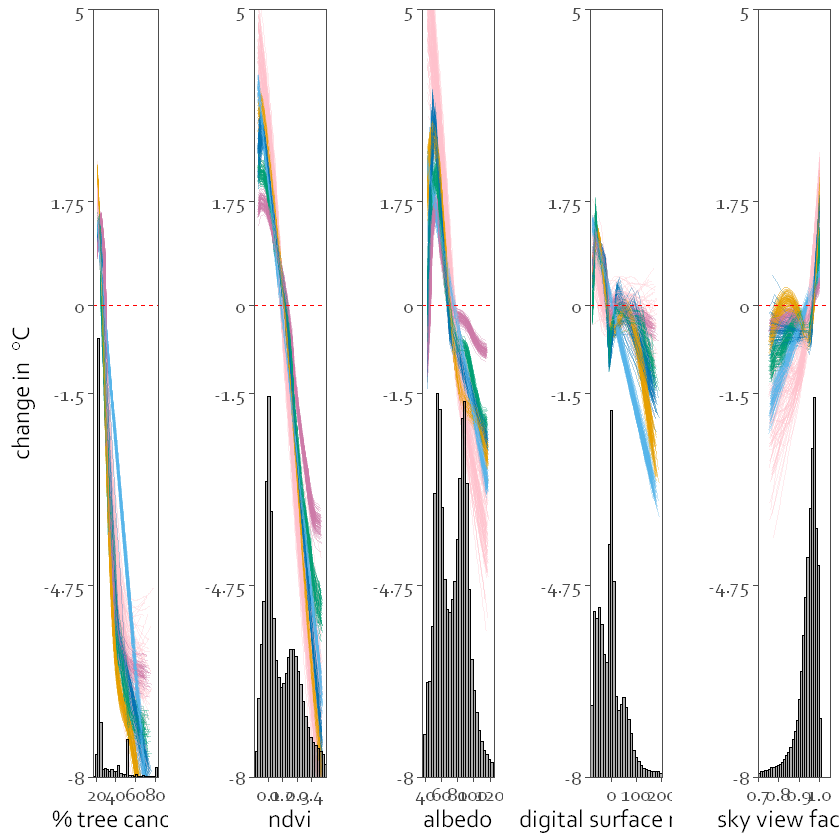

In [13]:
plots.grid <- do.call("grid.arrange", c(plots, ncol=ncol.plot))
outname <- paste0('../../fig/report/pdp_uncert_day_',grid.size,'.png')
ggsave(outname, plots.grid, width=17.8, height=3.5, dpi=500)

In [14]:
dt_sub <- dt[dependent == 'lst_night_max',]
plots <- list()
# import the feature order
if (grid.size == 500){
    features <- c('tree_min', 'ndvi_mean','svf_mean','tree_mean','dsm_mean') # c('lcov_11', 'ndvi_mean', 'tree_mean', 'alb_mean','dsm_mean')
    hist_scaling <- c(11, 0.8, 0.35, 20, 400)
    } else {
    features = c('tree_mean', 'ndvi_mean', 'tree_sd', 'svf_mean', 'alb_mean')#, 'alb_mean', 'tree_sd', 'nbdi_sd_sl', 'bldg', 'pdens_mean')
    hist_scaling <- c(25, 0.9, 10, 0.45, 250)
}
# determine the axis limits
y_min <- -8#round(min(dt[,'mean'])*2)/2
y_max <- 5#round(max(dt[,'mean'])*2)/2
ylims <- c(y_min,y_max) - y_min

for (i in seq(length(features))){
    var <- features[[i]]
    # subset the dataframe 
    dt_plot <- dt_sub[independent == var,]
    xlims <- c(min(dt_plot[,x]), max(dt_plot[,x])) + max(dt_plot[,x])*c(-0.05,0.05)
    # plot the lines
    plt <- ggplot(dt_plot,aes(x = x, y = mean - y_min, color = model)) +
        geom_line(aes(group = interaction(model, boot)), alpha = 0.3) +
        geom_hline(yintercept = -y_min, linetype="dashed", color = "red") + 
        xlab(feature_names[var]) + 
        ylab('') + 
        scale_colour_manual(values=cbbPalette) + 
        theme_few()  + 
        theme(text=element_text(size=font.size, family="Corbel"),
              legend.title = element_blank(),
              legend.position="none", 
              plot.title = element_text(size = font.size)
             ) + 
        guides(color = guide_legend(override.aes= list(alpha = 1))) +
        scale_y_continuous(breaks = c(seq(ylims[1], ylims[2],length = 5),-y_min), labels= c(seq(y_min,y_max,length = 5),0)) 
        if (i == 1 || i==6){
            plt <- plt + ylab(expression("change in "*~degree*C)) 
            }
#         ggtitle(health_titles[var]) + 
#         theme_black() +
#     if (i == 8){
#         plt <- plt + theme(text=element_text(size=10),
#               legend.title = element_blank(),
#               legend.position="none", 
#               plot.title = element_text(size = 10)
#              )
#         }
    # plot the histogram
    df_hist <- df[as.vector((df[, ..var] >= xlims[1]) & (df[,..var] <= xlims[2])),]
    plt <- plt + geom_histogram(data=df_hist, bins=30, mapping=aes_string(var, paste0('..density..*',hist_scaling[i])), color = 'black', alpha = 0.5)
    plt <- plt + coord_cartesian(ylim=ylims, xlim=xlims, expand=0)  
    # add to list
    plots[[i]] <- plt
#     ggsave('../../fig/report/pdp_uncert_day.png', plt, width=17.8/2.54, height=11.5/2.54)
    }

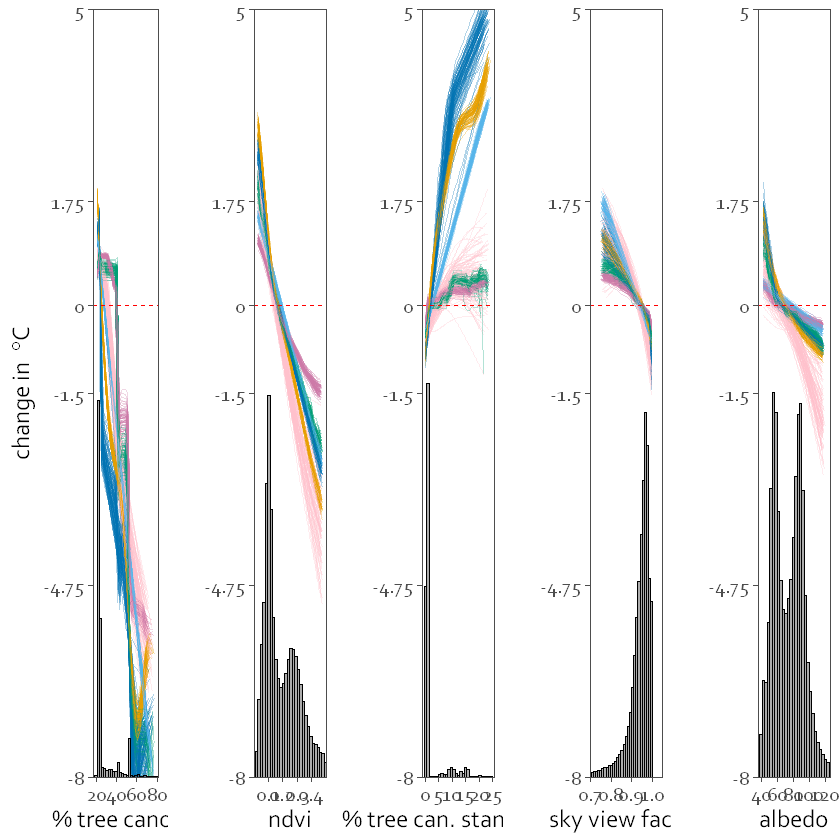

In [15]:
plots.grid <- do.call("grid.arrange", c(plots, ncol=ncol.plot))
outname <- paste0('../../fig/report/pdp_uncert_nightmax_',grid.size,'.png')
ggsave(outname, plots.grid, width=17.8, height=3.5, dpi=500)

In [16]:
dt_sub <- dt[dependent == 'lst_day_max',]
plots <- list()
# import the feature order
if (grid.size == 500){
    features <- c('tree_min', 'ndvi_mean','alb_mean','lcov_11','nbdi_max') # c('lcov_11', 'ndvi_mean', 'tree_mean', 'alb_mean','dsm_mean')
    hist_scaling <- c(11, 0.8, 200, 12, 0.7)
    } else {
    features = c('ndvi_mean', 'tree_mean', 'alb_mean', 'tree_sd', 'dsm_mean')#, 'alb_mean', 'tree_sd', 'nbdi_sd_sl', 'bldg', 'pdens_mean')
    hist_scaling <- c(0.9, 25, 250, 10, 400)
}
# determine the axis limits
y_min <- -8#round(min(dt[,'mean'])*2)/2
y_max <- 5#round(max(dt[,'mean'])*2)/2
ylims <- c(y_min,y_max) - y_min

for (i in seq(length(features))){
    var <- features[[i]]
    # subset the dataframe 
    dt_plot <- dt_sub[independent == var,]
    xlims <- c(min(dt_plot[,x]), max(dt_plot[,x])) + max(dt_plot[,x])*c(-0.05,0.05)
    # plot the lines
    plt <- ggplot(dt_plot,aes(x = x, y = mean - y_min, color = model)) +
        geom_line(aes(group = interaction(model, boot)), alpha = 0.3) +
        geom_hline(yintercept = -y_min, linetype="dashed", color = "red") + 
        xlab(feature_names[var]) + 
        ylab('') + 
        scale_colour_manual(values=cbbPalette) + 
        theme_few()  + 
        theme(text=element_text(size=font.size, family="Corbel"),
              legend.title = element_blank(),
              legend.position="none", 
              plot.title = element_text(size = font.size)
             ) + 
        guides(color = guide_legend(override.aes= list(alpha = 1))) +
        scale_y_continuous(breaks = c(seq(ylims[1], ylims[2],length = 5),-y_min), labels= c(seq(y_min,y_max,length = 5),0)) 
        if (i == 1 || i==6){
            plt <- plt + ylab(expression("change in "*~degree*C)) 
            }
#         ggtitle(health_titles[var]) + 
#         theme_black() +
#     if (i == 8){
#         plt <- plt + theme(text=element_text(size=10),
#               legend.title = element_blank(),
#               legend.position="none", 
#               plot.title = element_text(size = 10)
#              )
#         }
    # plot the histogram
    df_hist <- df[as.vector((df[, ..var] >= xlims[1]) & (df[,..var] <= xlims[2])),]
    plt <- plt + geom_histogram(data=df_hist, bins=30, mapping=aes_string(var, paste0('..density..*',hist_scaling[i])), color = 'black', alpha = 0.5)
    plt <- plt + coord_cartesian(ylim=ylims, xlim=xlims, expand=0)  
    # add to list
    plots[[i]] <- plt
#     ggsave('../../fig/report/pdp_uncert_day.png', plt, width=17.8/2.54, height=11.5/2.54)
    }

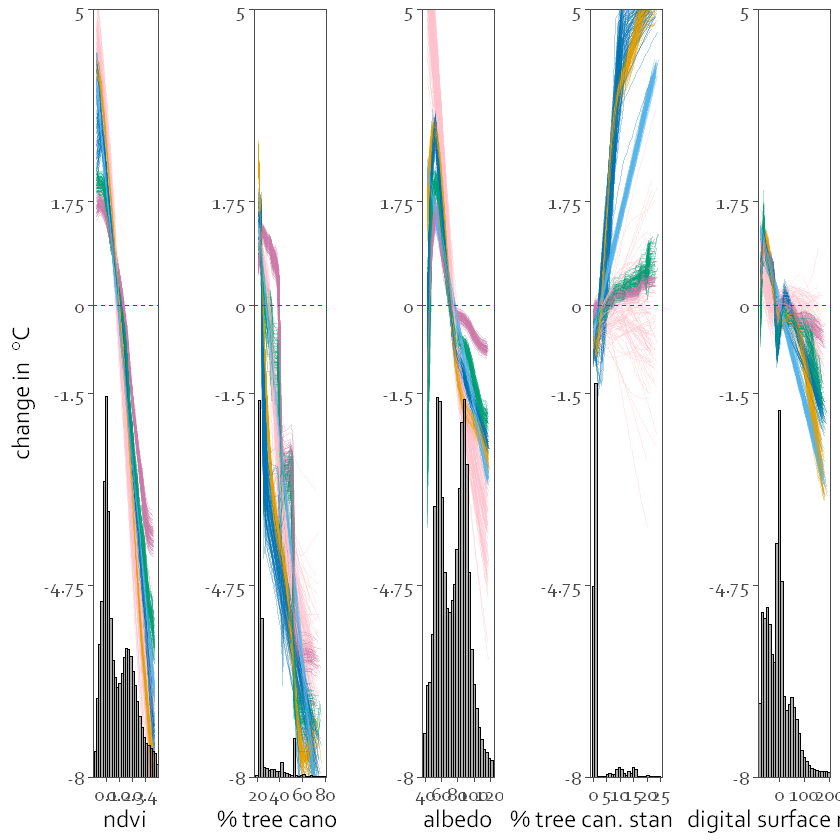

In [17]:
plots.grid <- do.call("grid.arrange", c(plots, ncol=ncol.plot))
outname <- paste0('../../fig/report/pdp_uncert_daymax_',grid.size,'.png')
ggsave(outname, plots.grid, width=17.8, height=3.5, dpi=500)